In [42]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.externals import *

In [43]:
Data_df = pd.read_csv('training.csv')
Data_df

,id,menopaus,agegrp,density,race,Hispanic,bmi,agefirst,nrelbc,brstproc,lastmamm,surgmeno,hrt,invasive,cancer,count
0,RE-TRAIN-0000001,0,1,1,1,0,1,0,0,0,9,9,9,0,0,2
1,RE-TRAIN-0000002,0,1,1,1,0,1,0,0,0,9,9,9,0,0,4
2,RE-TRAIN-0000003,0,1,1,1,0,1,0,1,0,0,9,9,0,0,1
3,RE-TRAIN-0000004,0,1,1,1,0,1,0,1,0,9,9,9,0,0,1
4,RE-TRAIN-0000005,0,1,1,1,0,1,1,0,0,0,9,9,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196457,RE-TRAIN-0196458,9,4,9,9,9,9,9,9,9,0,9,9,0,1,5
196458,RE-TRAIN-0196459,9,4,9,9,9,9,9,9,9,1,9,9,0,0,68
196459,RE-TRAIN-0196460,9,4,9,9,9,9,9,9,9,9,9,9,0,0,378
196460,RE-TRAIN-0196461,9,4,9,9,9,9,9,9,9,9,9,9,0,0,1132


In [44]:
# Describing the dataframe in detail
Data_df.describe()

,menopaus,agegrp,density,race,Hispanic,bmi,agefirst,nrelbc,brstproc,lastmamm,surgmeno,hrt,invasive,cancer,count
count,196462.000000,196462.000000,196462.000000,196462.000000,196462.000000,196462.000000,196462.000000,196462.000000,196462.000000,196462.000000,196462.000000,196462.000000,196462.000000,196462.000000,196462.000000
mean,1.308752,5.469674,4.093718,3.171438,2.887917,4.775483,3.372927,1.571271,1.450362,3.042176,4.118303,3.316484,0.025608,0.033187,8.474825
std,1.908668,2.387198,2.958682,3.145186,4.062008,3.469497,3.973707,3.057983,2.940595,4.198951,4.272907,4.050667,0.157963,0.179125,54.367564
min,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,4.000000,2.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,5.000000,3.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,7.000000,9.000000,4.000000,9.000000,9.000000,9.000000,1.000000,1.000000,9.000000,9.000000,9.000000,0.000000,0.000000,4.000000
max,9.000000,10.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,1.000000,7295.000000


In [45]:
Data_df.shape

(196462, 16)

In [46]:
Data_df.columns

Index(['id', 'menopaus', 'agegrp', 'density', 'race', 'Hispanic', 'bmi',
       'agefirst', 'nrelbc', 'brstproc', 'lastmamm', 'surgmeno', 'hrt',
       'invasive', 'cancer', 'count'],
      dtype='object')

In [47]:
Data_df.dtypes

id          object
menopaus     int64
agegrp       int64
density      int64
race         int64
Hispanic     int64
bmi          int64
agefirst     int64
nrelbc       int64
brstproc     int64
lastmamm     int64
surgmeno     int64
hrt          int64
invasive     int64
cancer       int64
count        int64
dtype: object

In [48]:
# Checking if there are any null values in the dataframe
Data_df.isnull().sum()

id          0
menopaus    0
agegrp      0
density     0
race        0
Hispanic    0
bmi         0
agefirst    0
nrelbc      0
brstproc    0
lastmamm    0
surgmeno    0
hrt         0
invasive    0
cancer      0
count       0
dtype: int64

In [49]:
Data_df2 = Data_df.drop(columns='id')
Data_df2

,menopaus,agegrp,density,race,Hispanic,bmi,agefirst,nrelbc,brstproc,lastmamm,surgmeno,hrt,invasive,cancer,count
0,0,1,1,1,0,1,0,0,0,9,9,9,0,0,2
1,0,1,1,1,0,1,0,0,0,9,9,9,0,0,4
2,0,1,1,1,0,1,0,1,0,0,9,9,0,0,1
3,0,1,1,1,0,1,0,1,0,9,9,9,0,0,1
4,0,1,1,1,0,1,1,0,0,0,9,9,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196457,9,4,9,9,9,9,9,9,9,0,9,9,0,1,5
196458,9,4,9,9,9,9,9,9,9,1,9,9,0,0,68
196459,9,4,9,9,9,9,9,9,9,9,9,9,0,0,378
196460,9,4,9,9,9,9,9,9,9,9,9,9,0,0,1132


array([[<AxesSubplot: title={'center': 'menopaus'}>,
        <AxesSubplot: title={'center': 'agegrp'}>,
        <AxesSubplot: title={'center': 'density'}>,
        <AxesSubplot: title={'center': 'race'}>],
       [<AxesSubplot: title={'center': 'Hispanic'}>,
        <AxesSubplot: title={'center': 'bmi'}>,
        <AxesSubplot: title={'center': 'agefirst'}>,
        <AxesSubplot: title={'center': 'nrelbc'}>],
       [<AxesSubplot: title={'center': 'brstproc'}>,
        <AxesSubplot: title={'center': 'lastmamm'}>,
        <AxesSubplot: title={'center': 'surgmeno'}>,
        <AxesSubplot: title={'center': 'hrt'}>],
       [<AxesSubplot: title={'center': 'invasive'}>,
        <AxesSubplot: title={'center': 'cancer'}>,
        <AxesSubplot: title={'center': 'count'}>, <AxesSubplot: >]],
      dtype=object)

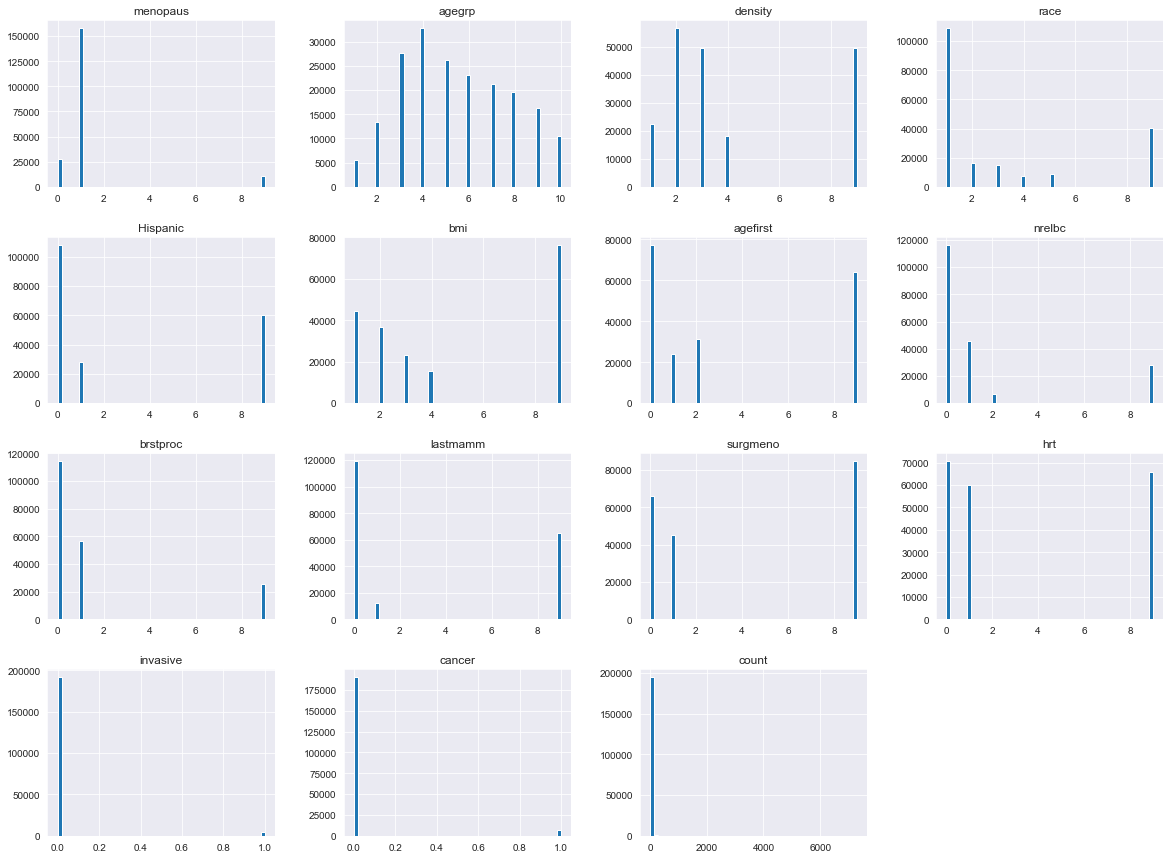

In [50]:
Data_df2.hist(bins=50, figsize=(20, 15))

In [64]:
X_train=Data_df2.drop(columns='cancer')
X_train

,menopaus,agegrp,density,race,Hispanic,bmi,agefirst,nrelbc,brstproc,lastmamm,surgmeno,hrt,invasive,count
0,0,1,1,1,0,1,0,0,0,9,9,9,0,2
1,0,1,1,1,0,1,0,0,0,9,9,9,0,4
2,0,1,1,1,0,1,0,1,0,0,9,9,0,1
3,0,1,1,1,0,1,0,1,0,9,9,9,0,1
4,0,1,1,1,0,1,1,0,0,0,9,9,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196457,9,4,9,9,9,9,9,9,9,0,9,9,0,5
196458,9,4,9,9,9,9,9,9,9,1,9,9,0,68
196459,9,4,9,9,9,9,9,9,9,9,9,9,0,378
196460,9,4,9,9,9,9,9,9,9,9,9,9,0,1132


In [61]:
y_train= Data_df2['cancer']
y_train

0         0
1         0
2         0
3         0
4         0
         ..
196457    1
196458    0
196459    0
196460    0
196461    1
Name: cancer, Length: 196462, dtype: int64

In [65]:
Risk_Analysis = KNeighborsClassifier()
Risk_Analysis.fit(X_train, y_train)
joblib.dump(Risk_Analysis, 'RiskAnalysis.joblib')

['RiskAnalysis.joblib']

In [55]:
Test_df = pd.read_csv('testing.csv')
Test_df

,id,menopaus,agegrp,density,race,Hispanic,bmi,agefirst,nrelbc,brstproc,lastmamm,surgmeno,hrt,invasive,count
0,RE-PROV-0000001,0,1,1,1,0,1,0,0,0,0,9,9,0,4
1,RE-PROV-0000002,0,1,1,1,0,2,0,1,0,9,9,9,0,1
2,RE-PROV-0000003,0,1,1,1,0,2,9,0,0,0,9,9,0,4
3,RE-PROV-0000004,0,1,1,1,0,2,9,1,0,0,9,9,0,2
4,RE-PROV-0000005,0,1,1,1,0,3,2,0,0,9,9,9,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28061,RE-PROV-0028062,9,4,9,9,9,9,9,1,0,9,9,9,0,1
28062,RE-PROV-0028063,9,4,9,9,9,9,9,9,0,0,9,9,0,108
28063,RE-PROV-0028064,9,4,9,9,9,9,9,9,0,9,9,9,0,36
28064,RE-PROV-0028065,9,4,9,9,9,9,9,9,1,0,9,9,0,19


In [56]:
Test_df.isnull().sum()

id          0
menopaus    0
agegrp      0
density     0
race        0
Hispanic    0
bmi         0
agefirst    0
nrelbc      0
brstproc    0
lastmamm    0
surgmeno    0
hrt         0
invasive    0
count       0
dtype: int64

In [67]:
X_test = Test_df.drop(columns='id')
X_test

,menopaus,agegrp,density,race,Hispanic,bmi,agefirst,nrelbc,brstproc,lastmamm,surgmeno,hrt,invasive,count
0,0,1,1,1,0,1,0,0,0,0,9,9,0,4
1,0,1,1,1,0,2,0,1,0,9,9,9,0,1
2,0,1,1,1,0,2,9,0,0,0,9,9,0,4
3,0,1,1,1,0,2,9,1,0,0,9,9,0,2
4,0,1,1,1,0,3,2,0,0,9,9,9,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28061,9,4,9,9,9,9,9,1,0,9,9,9,0,1
28062,9,4,9,9,9,9,9,9,0,0,9,9,0,108
28063,9,4,9,9,9,9,9,9,0,9,9,9,0,36
28064,9,4,9,9,9,9,9,9,1,0,9,9,0,19


In [68]:
ids = Test_df['id']
ids

0        RE-PROV-0000001
1        RE-PROV-0000002
2        RE-PROV-0000003
3        RE-PROV-0000004
4        RE-PROV-0000005
              ...       
28061    RE-PROV-0028062
28062    RE-PROV-0028063
28063    RE-PROV-0028064
28064    RE-PROV-0028065
28065    RE-PROV-0028066
Name: id, Length: 28066, dtype: object

In [69]:
joblib.load('RiskAnalysis.joblib')
Analysis = Risk_Analysis.predict(X_test)
Analysis

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
submission_data = pd.DataFrame({'id': ids, 'Analysis': Analysis})

submission_data.to_csv('Analysis.csv', index=False)